In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
file_name = '/data/Seasons_Stats.csv'
data = pd.read_csv(file_name)

# Display the first few rows of the dataset
print(data.head())

   Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

   ...    FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...  0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  ...  0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  ...  0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  ...  0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  ...  0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 53 columns]


In [14]:
# Drop rows with NaN values in specific columns required for the analysis
required_columns = ['PTS', 'G', 'TRB', 'AST', 'STL', 'BLK', 'FGA', 'FG', 'FTA', 'FT', 'TOV']
data = data.dropna(subset=required_columns)

# Ensure non-numeric columns are kept intact
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
data[non_numeric_cols] = data[non_numeric_cols].fillna('Unknown')

# Display the first few rows of the dataset after dropping NaNs
print(data.head())

      Unnamed: 0    Year                Player   Pos   Age   Tm     G  GS  \
5007        5007  1978.0       Zaid Abdul-Aziz  PF-C  31.0  TOT  16.0 NaN   
5008        5008  1978.0       Zaid Abdul-Aziz     C  31.0  BOS   2.0 NaN   
5009        5009  1978.0       Zaid Abdul-Aziz    PF  31.0  HOU  14.0 NaN   
5010        5010  1978.0  Kareem Abdul-Jabbar*     C  30.0  LAL  62.0 NaN   
5011        5011  1978.0         Tom Abernethy    SF  23.0  LAL  73.0 NaN   

          MP   PER  ...    FT%    ORB    DRB    TRB    AST    STL    BLK  \
5007   158.0  11.4  ...  0.739   19.0   31.0   50.0   10.0    3.0    3.0   
5008    24.0  11.5  ...  0.667    6.0    9.0   15.0    3.0    1.0    1.0   
5009   134.0  11.4  ...  0.750   13.0   22.0   35.0    7.0    2.0    2.0   
5010  2265.0  29.2  ...  0.783  186.0  615.0  801.0  269.0  103.0  185.0   
5011  1317.0  15.6  ...  0.820  105.0  160.0  265.0  101.0   55.0   22.0   

        TOV     PF     PTS  
5007   14.0   29.0    63.0  
5008    3.0    4.0    

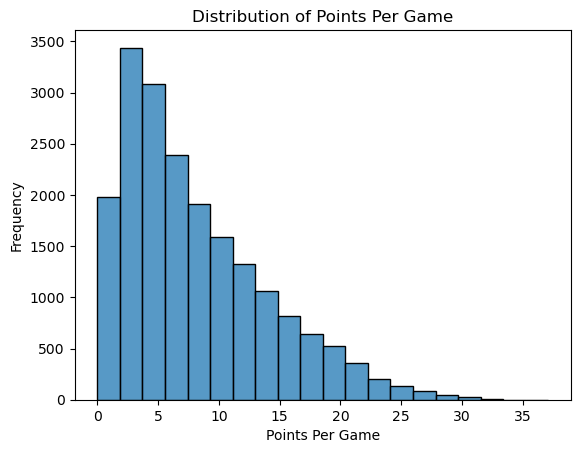

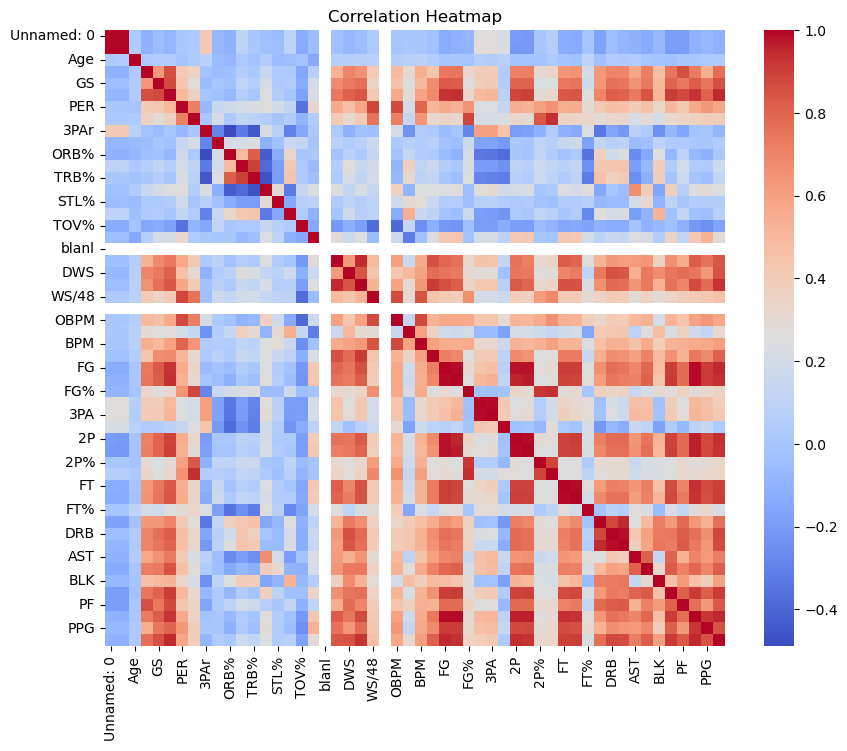

In [15]:
# Feature engineering (e.g., Points Per Game, Efficiency Rating)
data['PPG'] = data['PTS'] / data['G']
data['Efficiency'] = (data['PTS'] + data['TRB'] + data['AST'] + data['STL'] + data['BLK']) - \
                     ((data['FGA'] - data['FG']) + (data['FTA'] - data['FT']) + data['TOV'])

# Exploratory Data Analysis (EDA)

# Distribution of Points Per Game
sns.histplot(data['PPG'], bins=20)
plt.title('Distribution of Points Per Game')
plt.xlabel('Points Per Game')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap without annotations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Feature Selection
features = ['PPG', 'TRB', 'AST', 'STL', 'BLK', 'TOV']
X = data[features]
y = data['Efficiency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeling with Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print(f'Linear Regression Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Linear Regression R^2 Score: {r2_score(y_test, y_pred)}')

Linear Regression Mean Squared Error: 7646.673811914064
Linear Regression R^2 Score: 0.9717835904630411


Linear Regression Mean Squared Error: 7646.673811914064
Linear Regression R^2 Score: 0.9717835904630411


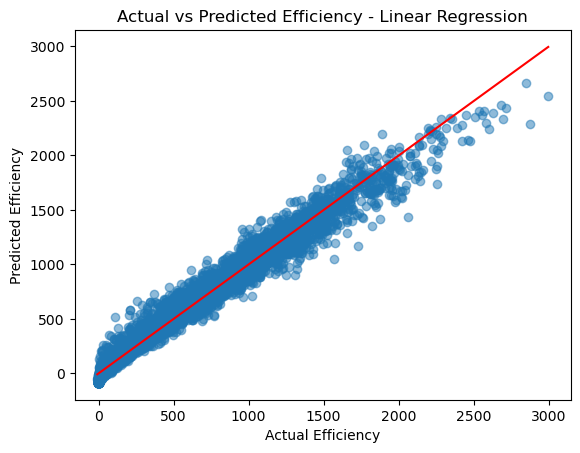

In [16]:
# Feature Selection
features = ['PPG', 'TRB', 'AST', 'STL', 'BLK', 'TOV']
X = data[features]
y = data['Efficiency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeling with Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print(f'Linear Regression Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Linear Regression R^2 Score: {r2_score(y_test, y_pred)}')

# Plot predicted vs actual efficiency
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Identity line
plt.xlabel('Actual Efficiency')
plt.ylabel('Predicted Efficiency')
plt.title('Actual vs Predicted Efficiency - Linear Regression')
plt.show()

Random Forest Mean Squared Error: 5503.616053441512
Random Forest R^2 Score: 0.979691524927331


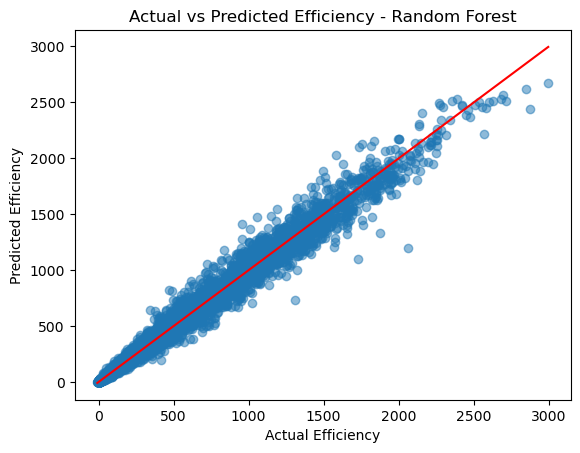

In [17]:
# Advanced Analysis - Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_y_pred = rf_reg.predict(X_test)
print(f'Random Forest Mean Squared Error: {mean_squared_error(y_test, rf_y_pred)}')
print(f'Random Forest R^2 Score: {r2_score(y_test, rf_y_pred)}')

# Plot predicted vs actual efficiency for Random Forest
plt.scatter(y_test, rf_y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Identity line
plt.xlabel('Actual Efficiency')
plt.ylabel('Predicted Efficiency')
plt.title('Actual vs Predicted Efficiency - Random Forest')
plt.show()

Logistic Regression Accuracy: 0.9696301323379708
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2903
           1       0.97      0.97      0.97      2991

    accuracy                           0.97      5894
   macro avg       0.97      0.97      0.97      5894
weighted avg       0.97      0.97      0.97      5894



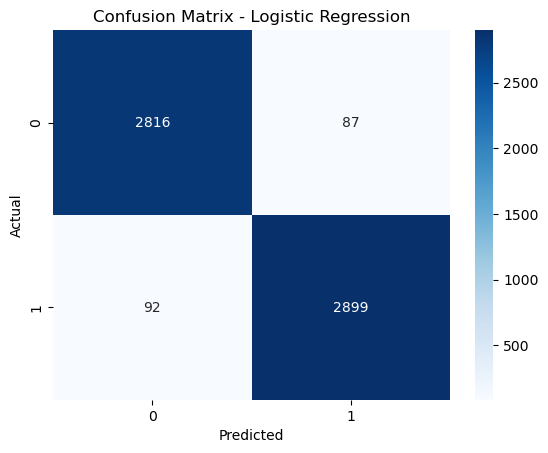

In [18]:
# Classification - Prepare target variable for classification
data['Efficient'] = data['Efficiency'] > data['Efficiency'].median()
y_class = data['Efficient'].astype(int)

# Split the data for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Logistic Regression for Classification
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_class, y_train_class)
y_pred_class = log_reg.predict(X_test_class)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test_class, y_pred_class)}')
print(classification_report(y_test_class, y_pred_class))

# Confusion matrix for Logistic Regression
cm = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Random Forest Classifier Accuracy: 0.9692908042076688
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2903
           1       0.97      0.97      0.97      2991

    accuracy                           0.97      5894
   macro avg       0.97      0.97      0.97      5894
weighted avg       0.97      0.97      0.97      5894



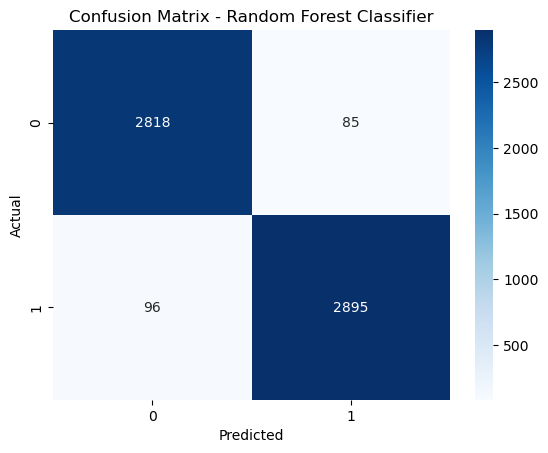

In [19]:
# Random Forest Classifier
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_train_class, y_train_class)
rf_y_pred_class = rf_class.predict(X_test_class)
print(f'Random Forest Classifier Accuracy: {accuracy_score(y_test_class, rf_y_pred_class)}')
print(classification_report(y_test_class, rf_y_pred_class))

# Confusion matrix for Random Forest Classifier
cm = confusion_matrix(y_test_class, rf_y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

Best Decision Tree Classifier Accuracy: 0.9635222259925348
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2903
           1       0.97      0.96      0.96      2991

    accuracy                           0.96      5894
   macro avg       0.96      0.96      0.96      5894
weighted avg       0.96      0.96      0.96      5894



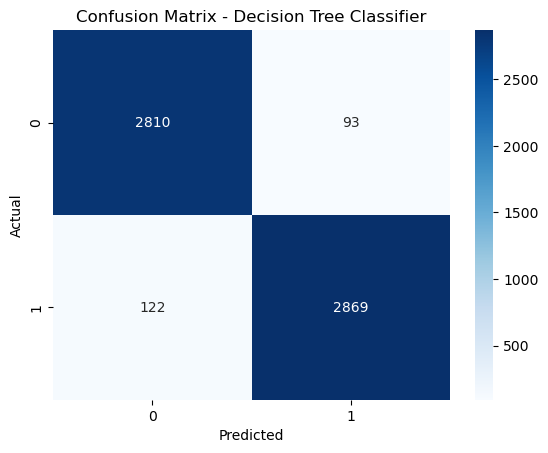

In [20]:
# Decision Tree Classifier with Grid Search
param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
dt_class = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_class, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_class, y_train_class)
best_dt_class = grid_search.best_estimator_
dt_y_pred_class = best_dt_class.predict(X_test_class)
print(f'Best Decision Tree Classifier Accuracy: {accuracy_score(y_test_class, dt_y_pred_class)}')
print(classification_report(y_test_class, dt_y_pred_class))

# Confusion matrix for Decision Tree Classifier
cm = confusion_matrix(y_test_class, dt_y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()